---
# 프로젝트 명: 대출 상환 예측 (Home Credit Default Risk)


## 데이터 출처: [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data)

## 프로젝트 개요

**[원문]**

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

**[번역]**

많은 사람들은 신용 기록이 불충분하거나 존재하지 않아 대출을 받기 위해 애를 씁니다. 불행히도,이 인구는 종종 신뢰할 수없는 대출 기관에 의해 이용됩니다.

주택 신용 그룹

주택 신용 기관(Home Credit)은 긍정적이고 안전한 차용 경험을 제공함으로써 비은행 인구를위한 재정적 포용을 확대하기 위해 노력합니다. 이 소외된 인구가 긍정적 인 대출 경험을 갖도록하기 위해 주택 신용 기관(Home Credit)은 고객의 상환 능력을 예측하기 위해 전화 및 거래 정보를 포함한 다양한 대체 데이터를 사용합니다.

주택 신용 기관(Home Credit)은 여러분의 다양한 통계 데이터 분석 능력과 머신러닝 방법을 활용하여, 고객이 은행 부채 상환능력에 대한 예측을 진행하고 있습니다. 그렇게하면 상환 가능한 고객이 거부되지 않고 성공적으로 원금, 만기 및 상환 일정에 따라 대출을 받을 수 있습니다.

## 프로젝트 목표
    1. `pandas`, `numpy`, `scikit-learn` 패키지를 활용하여 데이터 병합, 전처리, 피처 공학(feature engineering)을 진행합니다.
    2. 데이터에 대한 시각화를 통해 주요(Key) 데이터를 추출합니다.
    3. 머신러닝 모델을 만들고 예측 합니다.
    4. Kaggle에 제출해보고, 목표 점수까지 획득할 수 있도록 수정 및 보완합니다.


## 프로젝트 구성
    * 데이터 로드 (load data)
    * 데이터 시각화 (visualization)
    * 데이터 전처리 (pre-processing)
    * 머신러닝을 활용하여 baseline 모델링 (modeling for baseline)
    * 평가지표 생성 (evalutation)
    * 모델 앙상블, 데이터 전처리 개선으로 모델의 성능을 업그레이드 하여, 목표 점수에 도달

- 작성자: 이경록 감수자
---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')

%matplotlib inline

SEED = 34

## 데이터 살펴보기

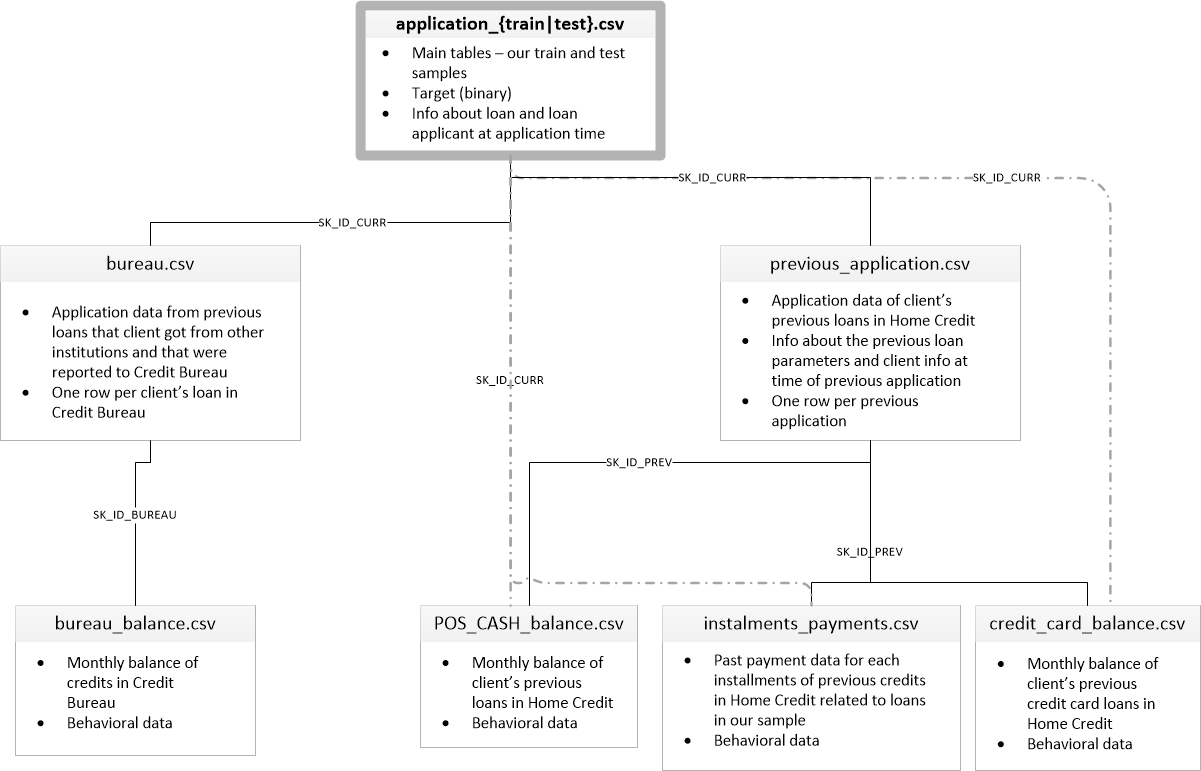

In [3]:
Image('data/home_credit.png')

큰일입니다. 복잡한 고객의 채무관계 파악을 위해서 주택 신용 기관(Home Credit)에서 고객 정보를 여러 파일에 저장했습니다. (실제 사례에서도 당연히, 이렇게 데이터들이 산재되어 있습니다.)

우리는, 이 복잡한 데이터를 분석하기 쉽도록 하나의 **데이터프레임(DataFrame)** 에 `merge` 하는 작업과 전처리(pre-processing)하는 과정을 진행하겠습니다.

**[중요]**

여러 개의 파일들을 하나의 데이터프레임으로 `merge` 할 때, `merge`의 중심이 되는 ID 값이 위의 도표에 친절히 나와있습니다.

너무 걱정 마세요! 제가 예제를 한 번 보여 드리면, 쉽게 따라 하실 수 있으니깐요.

## 파일에 대한 설명

**application_train.csv**, **application_test.csv**

- 2개의 파일이 바로 메인이 되는 파일입니다. 
- 제공되는 다른 파일 정보의 **중심이 되는 데이터**를 포함하고 있습니다. 
- 하나의 행은 데이터 샘플에서 하나의 대출을 의미합니다.

**bureau.csv**

- 신용 기관 (Credit Bureau) 에 보고된 다른 금융 기관에서 제공한 모든 고객의 이전 신용 정보를 포함합니다. (고객이 이전에 대출이 있는 경우)
- 샘플의 모든 대출에는 신청 날짜 이전에 고객이 신용 관리국에 보유한 크레딧 수만큼의 행이 있습니다.

**bureau_balance.csv**

- 신용 기관 (Credit Bureau)에서 이전 신용의 월별 잔액을 나타냅니다.

**POS_CASH_balance.csv**

- 이전 POS (판매 시점) 및 신청자가 주택 신용으로 보유한 현금 대출의 월별 잔액 스냅 샷입니다.

**credit_card_balance.csv**

- 신청자가 주택 신용으로 보유한 이전 시용카드의 월별 잔액 스냅샷입니다.

**previous_application.csv**

- 샘플에 대출이있는 고객의 주택 신용 대출에 대한 모든 이전 신청.

**installments_payments.csv**

- 샘플의 대출과 관련하여 이전에 지불한 주택 신용에 대한 상환 내역.

## Load Files

In [4]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

In [5]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [6]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


**`TARGET` 컬럼**

우리가 예측해야할 `label`입니다.

In [8]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

`all_data`라는 변수에 `train` 데이터와 `test` 데이터를 합쳐 줍니다.

전처리를 위하여 임시로 합쳐줍니다. 나중에 다시 train/test 로 분할 해야하기 때문에, 순서가 섞이면 안됩니다.

In [9]:
all_data = pd.concat([train, test], sort=False)

## 데이터 구조도

자주 데이터 구조도를 확인해가면서 **전처리 작업**을 진행합니다.

필요하면 별도의 창으로 띄워 놓거나, 프린트해서 보면서 풀어나가는 것도 방법입니다.

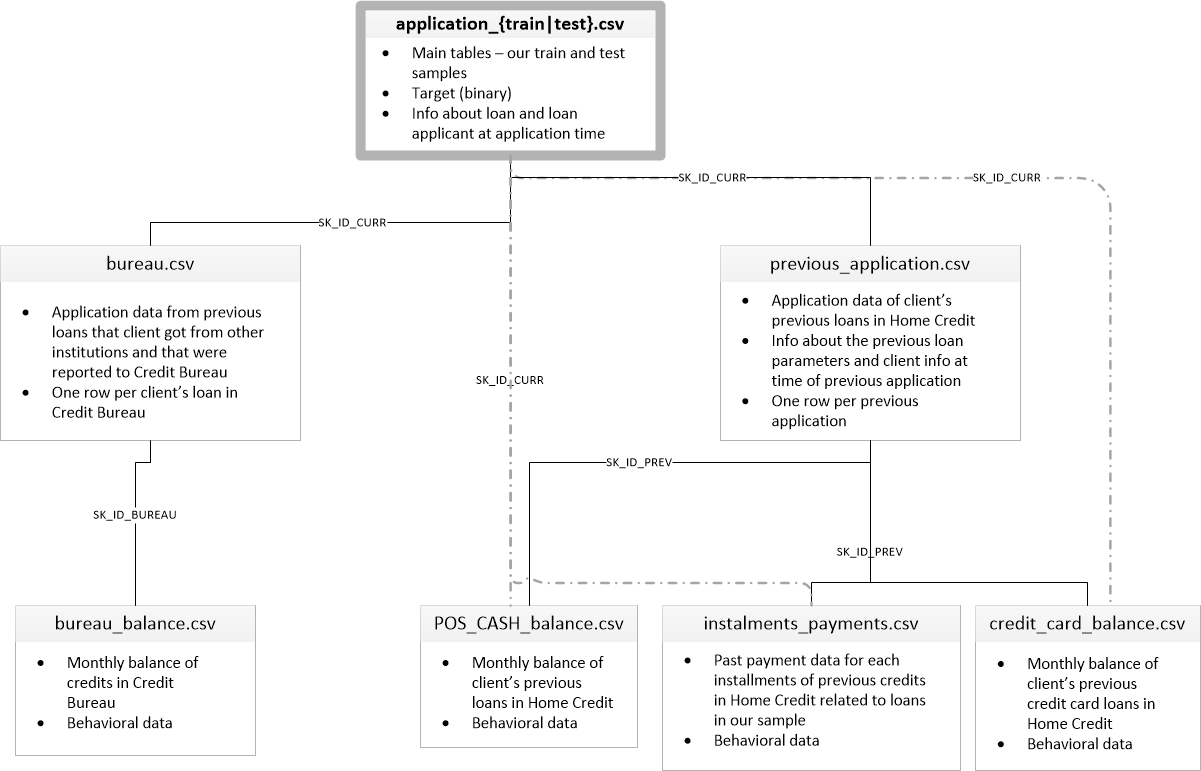

In [10]:
Image('data/home_credit.png')

## 전처리

### STEP 1. Bureau & Bureau Balance 데이터 병합

`bureau.csv` 파일부터 차근차근 데이터를 살펴보겠습니다.

In [11]:
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [12]:
bureau_balance = pd.read_csv('data/bureau_balance.csv')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


`SK_ID_BUREAU`로 bureau_balance 데이터와 bureau를 병합해주겠습니다.

하지만, bureau_balance의 `SK_ID_BUREAU` 키 값이 여러개 행을 포함합니다.

그렇기 때문에, 우리는 `groupby`를 통해 하나의 `SK_ID_BUREAU`에 대한 다양한 통계 정보를 bureau에 병합해주도록 하겠습니다.

In [13]:
right = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'] \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median'])

In [14]:
right.head()

,sum,count,mean,std,min,max,median
SK_ID_BUREAU,,,,,,,
5001709,-4656,97,-48.0,28.145456,-96,0,-48.0
5001710,-3403,83,-41.0,24.103942,-82,0,-41.0
5001711,-6,4,-1.5,1.290994,-3,0,-1.5
5001712,-171,19,-9.0,5.627314,-18,0,-9.0
5001713,-231,22,-10.5,6.493587,-21,0,-10.5


하나의 `SK_ID_BUREAU` 고유 키에 대한 다양한 통계 값으로 **right** 데이터프레임을 생성했습니다.

**right** 데이터프레임을 bureau 데이터프레임에 병합(merge) 해주도록 하겠습니다.

In [15]:
merged = pd.merge(
    left=bureau,
    right=right,
    how = 'left',
    on = 'SK_ID_BUREAU',
    left_index=True,
    right_index=True,
)

In [16]:
merged.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,-4656.0,97.0,-48.0,28.145456,-96.0,0.0,-48.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,-3403.0,83.0,-41.0,24.103942,-82.0,0.0,-41.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,-6.0,4.0,-1.5,1.290994,-3.0,0.0,-1.5
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,-171.0,19.0,-9.0,5.627314,-18.0,0.0,-9.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,-231.0,22.0,-10.5,6.493587,-21.0,0.0,-10.5
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,...,Credit card,-31,NaN,-105.0,15.0,-7.0,4.472136,-14.0,0.0,-7.0
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,...,Consumer credit,-22,NaN,-1770.0,60.0,-29.5,17.464249,-59.0,0.0,-29.5
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,...,Consumer credit,-1710,NaN,-3655.0,86.0,-42.5,24.969982,-85.0,0.0,-42.5
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,...,Consumer credit,-840,NaN,-231.0,22.0,-10.5,6.493587,-21.0,0.0,-10.5
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,...,Credit card,-690,NaN,-741.0,39.0,-19.0,11.401754,-38.0,0.0,-19.0


병합은 **left: bureau, right: right, 기준컬럼: SK_ID_BUREAU, how:는 bureau 기준이니 left 옵션**을 주도록 하였습니다.

**내가 병합을 잘 했는지 안했는지 확인하는 Tip!**

bureau가 합치기 전 row의 갯수와, 합친 후의 row의 갯수가 동일해야합니다. (bureau 기준으로 합쳤을 경우)

In [17]:
bureau.shape[0], merged.shape[0]

(1716428, 1716428)

In [18]:
merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,-4656.0,97.0,-48.0,28.145456,-96.0,0.0,-48.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,-3403.0,83.0,-41.0,24.103942,-82.0,0.0,-41.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,-6.0,4.0,-1.5,1.290994,-3.0,0.0,-1.5
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,-171.0,19.0,-9.0,5.627314,-18.0,0.0,-9.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,-231.0,22.0,-10.5,6.493587,-21.0,0.0,-10.5


동일하다면, 잘 합쳐 졌습니다!!!

### STEP 2. 이제는 merged 데이터프레임을 all_data에 합쳐 보겠습니다.

In [19]:
merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,-4656.0,97.0,-48.0,28.145456,-96.0,0.0,-48.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,-3403.0,83.0,-41.0,24.103942,-82.0,0.0,-41.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,-6.0,4.0,-1.5,1.290994,-3.0,0.0,-1.5
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,-171.0,19.0,-9.0,5.627314,-18.0,0.0,-9.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,-231.0,22.0,-10.5,6.493587,-21.0,0.0,-10.5


In [20]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


`SK_ID_CURR`을 기준으로 합치면 유효할 것 같습니다.

In [21]:
all_data.shape, merged.shape

((356255, 122), (1716428, 24))

**all_data**를 기준으로 **merged**데이터프레임을 병합하되, all_data를 기준으로 병합합니다.

그런데 이번에는 **merged** 데이터프레임에 다수의 `SK_ID_CURR`이 존재합니다.

그럼 다시 병합해야하는 컬럼 `SK_ID_CURR`을 기준으로  **groupby**를 수행하는데, 이번에는 카테고리형 컬럼의 **size, nunique(고유 value 갯수)**를 aggregate 해보겠습니다.

In [22]:
right = bureau[bureau.select_dtypes(exclude='object').columns] \
            .groupby('SK_ID_CURR') \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median']).reset_index()
print(right.shape)
right.head(10)

(305811, 92)


SK_ID_CURR SK_ID_BUREAU                                                      \
                      sum count          mean           std      min      max   
0     100001     41276431     7  5.896633e+06      2.160247  5896630  5896636   
1     100002     49226177     8  6.153272e+06  15935.004993  6113835  6158909   
2     100003     23543514     4  5.885878e+06      1.290994  5885877  5885880   
3     100004     13658267     2  6.829134e+06      0.707107  6829133  6829134   
4     100005     20205603     3  6.735201e+06      1.000000  6735200  6735202   
5     100007      5987200     1  5.987200e+06           NaN  5987200  5987200   
6     100008     19474299     3  6.491433e+06      1.000000  6491432  6491434   
7     100009    101718094    18  5.651005e+06      5.704029  5650996  5651014   
8     100010     11153262     2  5.576631e+06      1.414214  5576630  5576632   
9     100011     22964334     4  5.741084e+06      1.290994  5741082  5741085   

             DAYS_CREDIT        ... DAYS_CREDIT_UPDATE               \
      median         sum count  ...                min  max  median   
0  5896633.0       -5145     7  ...               -155   -6  -155.0   
1  6158905.5       -6992     8  ...              -1185   -7  -402.5   
2  5885878.5       -5603     4  ...              -2131  -43  -545.0   
3  6829133.5       -1734     2  ...               -682 -382  -532.0   
4  6735201.0        -572     3  ...               -121  -11   -31.0   
5  5987200.0       -1149     1  ...               -783 -783  -783.0   
6  6491433.0       -2272     3  ...              -1027  -16  -790.0   
7  5651005.5      -22887    18  ...              -2152  -23  -898.0   
8  5576631.0       -3879     2  ...              -1138  -18  -578.0   
9  5741083.5       -7092     4  ...              -2172 -965 -1341.0   

  AMT_ANNUITY                                                       
          sum count         mean          std  min      max median  
0     24817.5     7  3545.357143  4800.607529  0.0  10822.5    0.0  
1         0.0     7     0.000000     0.000000  0.0      0.0    0.0  
2         0.0     0          NaN          NaN  NaN      NaN    NaN  
3         0.0     0          NaN          NaN  NaN      NaN    NaN  
4      4261.5     3  1420.500000  2460.378172  0.0   4261.5    0.0  
5         0.0     0          NaN          NaN  NaN      NaN    NaN  
6         0.0     0          NaN          NaN  NaN      NaN    NaN  
7         0.0     0          NaN          NaN  NaN      NaN    NaN  
8         0.0     0          NaN          NaN  NaN      NaN    NaN  
9         0.0     0          NaN          NaN  NaN      NaN    NaN  

[10 rows x 92 columns]

### Q1. all_data 기준으로 right 데이터프레임을 병합해 주세요

all_data를 기준으로 right 데이터프레임을 병합하고, all_data 변수에 다시 할당해 주세요

In [23]:
# 여기에 코드를 입력해 주세요 #
all_data = pd.merge(
    left=all_data,
    right=right,
    how = 'left',
    on = 'SK_ID_CURR'
)
###############################
all_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(DAYS_CREDIT_UPDATE, min)","(DAYS_CREDIT_UPDATE, max)","(DAYS_CREDIT_UPDATE, median)","(AMT_ANNUITY, sum)","(AMT_ANNUITY, count)","(AMT_ANNUITY, mean)","(AMT_ANNUITY, std)","(AMT_ANNUITY, min)","(AMT_ANNUITY, max)","(AMT_ANNUITY, median)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,-7.0,-402.5,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2131.0,-43.0,-545.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-682.0,-382.0,-532.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,-783.0,-783.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,100008,0.0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-1027.0,-16.0,-790.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,100009,0.0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,-2152.0,-23.0,-898.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,100010,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-1138.0,-18.0,-578.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,100011,0.0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,-2172.0,-965.0,-1341.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,100012,0.0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 검증 코드
all_data.shape == (356255, 213)

True

### STEP 3. POS_CASH_balance 전처리 및 병합

자, 이번에는 **POS_CASH_balance**데이터를 **all_data**에 병합해보겠습니다.

In [25]:
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
print(pos_cash_balance.shape)
pos_cash_balance.tail()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


In [26]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(DAYS_CREDIT_UPDATE, min)","(DAYS_CREDIT_UPDATE, max)","(DAYS_CREDIT_UPDATE, median)","(AMT_ANNUITY, sum)","(AMT_ANNUITY, count)","(AMT_ANNUITY, mean)","(AMT_ANNUITY, std)","(AMT_ANNUITY, min)","(AMT_ANNUITY, max)","(AMT_ANNUITY, median)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,-7.0,-402.5,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2131.0,-43.0,-545.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-682.0,-382.0,-532.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,-783.0,-783.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### Q2. pos_cash_balance 데이터를 `SK_ID_CURR` 기준으로 group 하고, 다음 6개의 column에 대하여 aggregate 합니다.

- sum, mean, std, min, max, median
- groupby 한 데이터프레임은 **right** 에 할당합니다.

In [27]:
# 여기에 코드를 입력해 주세요 #
right = pos_cash_balance[pos_cash_balance.select_dtypes(exclude='object').columns] \
            .groupby('SK_ID_CURR') \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()
print(right.shape)
###############################
right.head()

(337252, 37)


SK_ID_CURR SK_ID_PREV                                                 \
                    sum          mean            std      min      max   
0     100001   14256401  1.584045e+06  254189.675833  1369693  1851984   
1     100002   19737542  1.038818e+06       0.000000  1038818  1038818   
2     100003   64334628  2.297665e+06  329593.011850  1810518  2636178   
3     100004    6256056  1.564014e+06       0.000000  1564014  1564014   
4     100005   27452425  2.495675e+06       0.000000  2495675  2495675   

             MONTHS_BALANCE                        ...    SK_DPD          \
      median            sum       mean        std  ...       std min max   
0  1369693.0           -653 -72.555556  20.863312  ...  2.333333   0   7   
1  1038818.0           -190 -10.000000   5.627314  ...  0.000000   0   0   
2  2396755.0          -1226 -43.785714  24.640162  ...  0.000000   0   0   
3  1564014.0           -102 -25.500000   1.290994  ...  0.000000   0   0   
4  2495675.0           -220 -20.000000   3.316625  ...  0.000000   0   0   

         SK_DPD_DEF                                     
  median        sum      mean       std min max median  
0    0.0          7  0.777778  2.333333   0   7    0.0  
1    0.0          0  0.000000  0.000000   0   0    0.0  
2    0.0          0  0.000000  0.000000   0   0    0.0  
3    0.0          0  0.000000  0.000000   0   0    0.0  
4    0.0          0  0.000000  0.000000   0   0    0.0  

[5 rows x 37 columns]

### Q3. right 데이터프레임을 all_data에 병합합니다.

- 기준 컬럼은 `SK_ID_CURR` 입니다.
- 병합된 컬럼은 all_data에 할당합니다.

In [28]:
# 여기에 코드를 입력해 주세요 #
all_data = pd.merge(all_data, right, on='SK_ID_CURR', how='left')
###############################
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(SK_DPD, std)","(SK_DPD, min)","(SK_DPD, max)","(SK_DPD, median)","(SK_DPD_DEF, sum)","(SK_DPD_DEF, mean)","(SK_DPD_DEF, std)","(SK_DPD_DEF, min)","(SK_DPD_DEF, max)","(SK_DPD_DEF, median)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
all_data.shape

(356255, 249)

In [30]:
# 검증코드
all_data.shape == (356255, 249)

True

## 시각화

### Q4. 간단한 시각화를 통해 우리가 예측해야할 데이터 샘플의 차이를 살펴 봅니다.

- 시각화 대상 컬럼: `TARGET` (예측값)
    
데이터의 불균형도를 확인합니다.

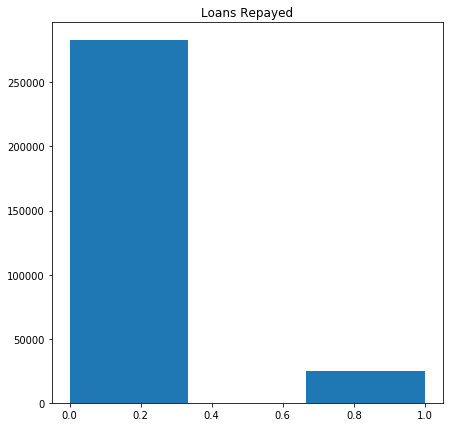

In [31]:
plt.figure(figsize = (7, 7))
# 코드를 입력해 주세요
plt.hist(x = all_data['TARGET'],  bins=3)
plt.title('Loans Repayed')
plt.show()

---
>- 리뷰
   - histogram으로 진행해주셨네요
   - 데이터 분포는 얼추 알아볼 수 있을 것 같긴 한데
   - 어떤 데이터에 대해 구성되어 있는지 알기가 어렵네요
     - TARGET이 두 가지 값으로 되어 있는 것 같은데
     - 그 값이 뭔지 알 수가 없네요?!
     - LABEL을 부여 하는 방법
     - 혹은 HISTOGRAM이 아닌 단순 count하는 plot을 사용하시면 어떻게 해결될 것 같네요

## 문자형 컬럼에 대한 처리 (수치형 컬럼 변환)

In [32]:
# 카테고리형 (문자형) 컬럼만 뽑아서 보겠습니다.
cat_cols = all_data.select_dtypes(include='object').columns
all_data[cat_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [33]:
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

### Q5. 카테고리형 컬럼에 대하여 LabelEncoding을 해주세요. 

- 어떤 패키지/라이브러리를 활용하든 상관없습니다.
- 문자형 컬럼을 숫자형으로 인코딩합니다.

In [34]:
# 여기에 코드를 입력해 주세요 #
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i, col in enumerate(all_data):
            if all_data[col].dtype == 'object':
                # Map the categorical features to integers
                all_data[col] = le.fit_transform(np.array(all_data[col].astype(str)).reshape((-1,)))
###############################
# 결과 예시
all_data[cat_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,3,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,3,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,0,1,7,2
3,0,0,0,1,6,7,4,0,1,8,6,5,0,1,7,2
4,0,1,0,1,6,7,4,3,1,3,4,37,0,1,7,2


In [35]:
all_data.replace('all_data[cat_cols]')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(SK_DPD, std)","(SK_DPD, min)","(SK_DPD, max)","(SK_DPD, median)","(SK_DPD_DEF, sum)","(SK_DPD_DEF, mean)","(SK_DPD_DEF, std)","(SK_DPD_DEF, min)","(SK_DPD_DEF, max)","(SK_DPD_DEF, median)"
0,100002,1.0,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,0,0,0,1,0,121500.0,412560.0,17473.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356251,456222,NaN,0,0,0,0,2,157500.0,622413.0,31909.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356252,456223,NaN,0,0,1,1,1,202500.0,315000.0,33205.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356253,456224,NaN,0,1,0,0,0,225000.0,450000.0,25128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
>- 리뷰
   - 잘해주셨습니다.
   - labelencoding의 경우 object부분과 분리하지 않고 진행하셔도 될 것 같아요
   - column을 선택하는 부분도 하나씩 하시지 않고
   - list 그대로 넣어도 다 잘 되겠구요!
   - apply를 이용하면 좀 더 짧게도 표현이 가능하겠습니다.

## train / test 의 데이터를 분할합니다.

In [57]:
train_data = all_data[:len(train)]
test_data = all_data[len(train):]

In [58]:
Y = train_data['TARGET']

In [59]:
Y

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: TARGET, Length: 307511, dtype: float64

In [60]:
test_data = test_data.drop('TARGET', 1)
train_data = train_data.drop('TARGET', 1)

In [61]:
train_data.isnull().sum()

SK_ID_CURR                  0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
                        ...  
(SK_DPD_DEF, mean)      18067
(SK_DPD_DEF, std)       18420
(SK_DPD_DEF, min)       18067
(SK_DPD_DEF, max)       18067
(SK_DPD_DEF, median)    18067
Length: 248, dtype: int64

In [62]:
test_data.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
                       ... 
(SK_DPD_DEF, mean)      936
(SK_DPD_DEF, std)       955
(SK_DPD_DEF, min)       936
(SK_DPD_DEF, max)       936
(SK_DPD_DEF, median)    936
Length: 248, dtype: int64

#### NULL값 0으로 대체

In [63]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [64]:
# 검증코드
train_data.shape[0] == train.shape[0]

True

In [65]:
# 검증코드
test_data.shape[0] == test.shape[0]

True

In [66]:
train_data.shape

(307511, 248)

In [67]:
test_data.shape

(48744, 248)

**train_data, test_data로 분할**해 주었습니다. 이제는 검증세트까지 만들어 보겠습니다.

In [68]:
train_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,"(SK_DPD, std)","(SK_DPD, min)","(SK_DPD, max)","(SK_DPD, median)","(SK_DPD_DEF, sum)","(SK_DPD_DEF, mean)","(SK_DPD_DEF, std)","(SK_DPD_DEF, min)","(SK_DPD_DEF, max)","(SK_DPD_DEF, median)"
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,1.212678,0.0,5.0,0.0,5.0,0.294118,1.212678,0.0,5.0,0.0
307509,456254,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [71]:
X = train_data

In [72]:
XX = test_data

### Q6. train_test_split 을 활용하여, 데이터를 분할해 주세요

train_test_split()의 다음 2개의 파라미터에 대하여 고정 값으로 입력해 주세요

In [69]:
from sklearn.model_selection import train_test_split

random_state=34
test_size=0.2

In [73]:
# 여기에 코드를 입력해 주세요 #
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)
###############################

---
>- 리뷰
   - 음 아쉽네요
   - 다 잘 들어갔는데 x의 자리의 train_data의 경우 y_train값도 같이 포함하고 있습니다.
   - 정답도 같이 들어가있어 학습하는데엔 영향을 끼칠 것 같네요

## 모델링

In [74]:
from sklearn.ensemble import RandomForestClassifier

### Q7. RandomForestClassifier 앙상블 모델을 활용하여 모델을 학습합니다.

In [75]:
# 코드를 입력해 주세요 #
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
start = time.time() # 시작 시간 지정
clf = RandomForestClassifier(max_depth=2, random_state=24, n_estimators=100)
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(Y_test, clf_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산
########################

Accuracy: 91.93 %
Time: 18.05 seconds


### Extra. 전처리, 모델 변경 등을 통해서 더 나은 예측 모델을 만들어서 캐글 상위권에 도전합니다 (0.73 이상)

In [86]:
import xgboost as xgb
import time
start = time.time() # 시작 시간 지정
xgb_dtrain = xgb.DMatrix(data = X_train, label = Y_train) # 학습 데이터를 XGBoost 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = X_test) # 평가 데이터를 XGBoost 모델에 맞게 변환
xgb_param = {'max_depth': 10, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 100, # Number of trees, 트리 생성 개수
         'objective': 'multi:softmax', # 목적 함수
        'num_class': len(set(Y_train)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(Y_test, xgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

ValueError: Found input variables with inconsistent numbers of samples: [61503, 48744]

---
>- 리뷰
   - 네 아주 잘해주셨네요!
   - 앙상블모델도 잘 만들어 주셨고
   - hyperparameter도 잘 만들어주셨습니다.
   - 해설에는 kaggle에 제출하는 방법을 포함하고 있으니 참고해서 제출까지 꼭 진행해보시기 바랍니다.

In [92]:
from datetime import datetime

t = datetime.now().strftime('%Y-%m-%d-%H-%M') #파일이름에 작업시간넣기
filename = '{0}-submission.csv'.format(t)     #파일이름

print(filename) # 파일 이름확인

2020-09-21-19-09-submission.csv


In [93]:
sample_submission = pd.read_csv(r'C:\Users\MOMOZZING\WorkSpace\kaggle\Home Credit Default Risk\data\sample_submission.csv') # 파일위치
final_prediction = xgb_model_predict #예측결과 넣기

In [94]:
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [95]:
final_prediction.shape

(48744,)

In [96]:
sample_submission['TARGET'] = xgb_model_predict #타겟값에 예측결과 넣기
sample_submission.to_csv(filename, index=False) #csv파일로 변환